# HOUSE PRICE PREDICTION USING LINEAR AND XGBOOST REGRESSION


**IMPORTING DEPENDENCIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline

**IMPORTING DATASET**

In [2]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#Printing column names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [4]:
df.shape

(506, 14)

**CHECKING FOR MISSING OR NULL VALUES**

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

**REPLACING THE NUL VALUES WITH MEDIAN**

In [6]:
for i in df:
  if(df[i].isnull().sum()>0):
    df[i].fillna(df[i].median(), inplace=True)

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

**STATISTICAL ANALYSIS OF THE DATASET**

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEATURES OF THE DATASET THOUGH HEAT MAP** 

             CRIM        ZN     INDUS  ...         B     LSTAT     PRICE
CRIM     1.000000 -0.185359  0.392632  ... -0.365336  0.437417 -0.383895
ZN      -0.185359  1.000000 -0.507304  ...  0.170125 -0.398838  0.362292
INDUS    0.392632 -0.507304  1.000000  ... -0.354840  0.564508 -0.476394
CHAS    -0.055585 -0.032992  0.054693  ...  0.050608 -0.047279  0.183844
NOX      0.410971 -0.498619  0.738387  ... -0.380051  0.573040 -0.427321
RM      -0.220045  0.312295 -0.377978  ...  0.128069 -0.604323  0.695360
AGE      0.343427 -0.535341  0.614248  ... -0.268029  0.575022 -0.377572
DIS     -0.366025  0.632428 -0.698621  ...  0.291512 -0.483244  0.249929
RAD      0.601224 -0.300061  0.592735  ... -0.444413  0.467765 -0.381626
TAX      0.560469 -0.304385  0.716267  ... -0.441808  0.524156 -0.468536
PTRATIO  0.277964 -0.394622  0.385366  ... -0.177383  0.370727 -0.507787
B       -0.365336  0.170125 -0.354840  ...  1.000000 -0.370993  0.333461
LSTAT    0.437417 -0.398838  0.564508  ... -0.37099

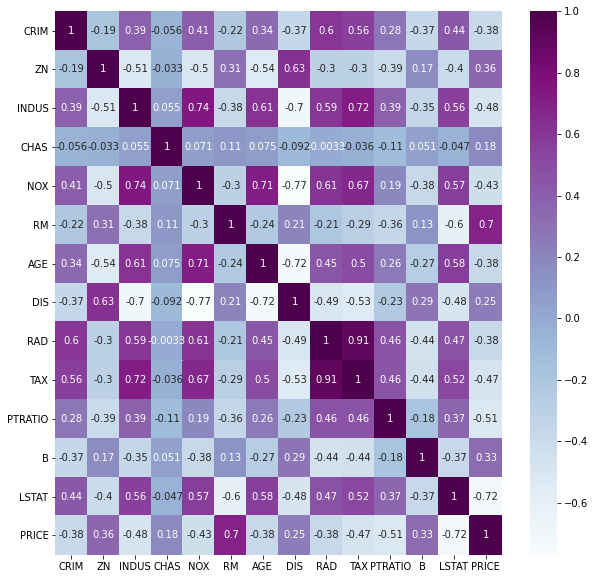

In [8]:
s=df.corr()
print(s)
plt.figure(figsize=(10,10))
corr_features = s.index
g=sns.heatmap(df[corr_features].corr(),annot=True,cmap="BuPu")

**SPLITTING DATA**

In [9]:
X = df.drop(['PRICE'], axis=1)
Y = df['PRICE']

In [10]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...    3  222     18.7  396.90  11.43
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...    1  273     21.0  391.99  11.43
502  0.04527   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1      21.6
2      34.7
3  

**SPLITTING THE DATA INTO TESTING AND TRAINING DATA**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


**1) FOR LINEAR REGRESSON**

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#PREDICTION ON TRAINING DATA
training_pred=model.predict(X_train)
training_pred

array([23.88836455, 17.3923592 , 22.13362487, 42.8133064 , 21.89562646,
       18.11213261, 20.9416109 , 31.48699698, 14.03628422, 24.86244282,
       30.29804986, 31.27441849, 27.78398596, 26.96469201, 22.74717729,
       18.89082215, 23.06004172, 23.41736651, 24.99925676, 12.25289563,
       31.90724471, 14.62057125, 13.61722744, 17.67100463, 28.11340044,
       23.08059951, 41.10394567, -3.29635481, 19.18089515, 17.2314418 ,
       24.29040701, 20.44993869, 18.65670392, 13.79713974, 24.04209665,
       35.99837216, 36.31661657,  6.46357151, 32.27241991, 21.68100705,
       26.17604242, 24.84008869, 32.6921797 , 17.17225364, 17.83880006,
       20.35327476, 29.91761039, 33.52463783, 15.92183001, 23.15965308,
       21.38204349, 14.16560592, 14.21718745, 15.35118121, 10.69865011,
       24.77881816, 13.48854849, 20.17917761, 20.71077322, 33.74857673,
       23.82788153, 27.91908368, 36.74722497, 12.79158604, 36.55691945,
       31.07557823, 14.33414493, 20.77797509, 30.6578559 , 21.18

In [15]:
print('R squared error: ', metrics.r2_score(Y_train, training_pred))

R squared error:  0.7422159911282813


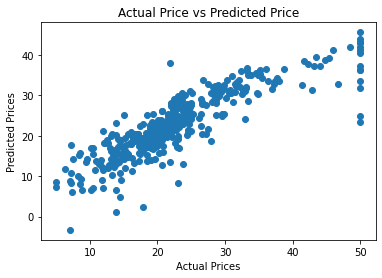

In [16]:
plt.scatter(Y_train, training_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [17]:
#PREDICTION ON TESTING DATA
test_pred=model.predict(X_test)
test_pred

array([37.59390794, 18.91523586, 25.73318149, 25.06634435, 21.22649421,
       35.80920553, 23.52271236, 22.27214987, 13.97432193, 15.92964368,
        9.43957825, 28.02117517, 19.45734993, 19.62464158, 40.77045454,
       16.85788979, 17.42844951, 33.05663856, 24.12742324, 24.80545268,
       16.84343365, 22.61439043, 20.26523264, 15.65014094, 10.56653666,
       12.24988738, 17.36432558, 25.27384798, 33.0440625 , 29.16499172,
       41.61968743, 34.5003576 , 26.08676495, 22.65976646, 16.56957654,
       22.72217182, 32.90673963, 20.43253133, 14.36571406, 23.79466759,
       21.5908405 , 21.30401295, 18.62669064, 25.02835201, 13.5996717 ,
       20.76149429, 16.98862879, 15.25334376, 20.4943804 , 17.74432038,
       18.97271118, 17.32653702, 13.55287009, 28.65584473, 20.97933016,
       24.7850251 , 23.33026813, 21.80905342, 16.05030296, 18.55903795,
       20.85929436, 25.81868189, 10.37273602, 31.870919  , 21.06235634,
       21.75047201, 13.85660192, 29.91717306, 24.3799803 , 12.38

In [18]:
print('R squared error: ', metrics.r2_score(Y_test, test_pred))

R squared error:  0.6779916827458308


**2) XGBOOST REGRESSION**

In [19]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

[15:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [20]:
#PREDICTION ON TRAINING DATA
training_pred=model.predict(X_train)
training_pred

array([21.098639 , 19.952658 , 20.407806 , 49.104588 , 20.730415 ,
       12.649908 , 21.352041 , 28.809153 , 14.493869 , 25.753323 ,
       33.028    , 31.86131  , 26.383204 , 22.575277 , 20.813164 ,
       17.781336 , 22.668922 , 20.573744 , 23.945946 , 14.209188 ,
       33.278053 , 16.181292 , 10.202014 ,  9.860999 , 25.255396 ,
       20.011005 , 48.86129  ,  7.8559976, 20.099464 , 20.92064  ,
       24.260687 , 21.211563 , 26.838144 , 17.910303 , 23.151634 ,
       33.656338 , 49.357857 ,  9.268283 , 31.863937 , 20.496695 ,
       20.92253  , 23.474306 , 33.446323 , 21.790228 , 19.34201  ,
       19.45043  , 27.474813 , 35.5471   , 17.588625 , 21.217463 ,
       21.434965 , 15.3794   , 14.949134 , 13.3925705,  8.237669 ,
       48.68019  , 14.861642 , 16.408337 , 22.065609 , 30.138237 ,
       22.314856 , 25.248041 , 34.470192 , 13.941586 , 38.9663   ,
       26.734911 ,  9.572781 , 19.2623   , 27.585045 , 16.37247  ,
       21.480791 , 50.371723 , 11.170512 , 28.34387  , 22.6729

In [21]:
print('R squared error: ', metrics.r2_score(Y_train, training_pred))

R squared error:  0.9706172665471723


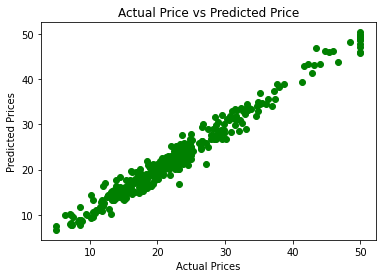

In [22]:
plt.scatter(Y_train, training_pred, color="green")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [23]:
#PREDICTION ON TESTING DATA
test_pred=model.predict(X_test)
test_pred

array([43.059864 , 20.36132  , 21.645489 , 23.144718 , 19.006845 ,
       33.826477 , 21.528084 , 21.440983 , 15.031532 , 18.340132 ,
        9.417543 , 25.673674 , 19.83355  , 18.579021 , 50.048107 ,
       15.490002 , 14.865812 , 33.111904 , 23.433273 , 23.315428 ,
       10.4734955, 23.147707 , 20.227314 , 17.321419 , 20.953154 ,
        9.00492  , 20.763391 , 24.442747 , 32.769783 , 23.309238 ,
       43.875275 , 31.199774 , 23.78004  , 21.738838 , 14.862709 ,
       24.295088 , 31.615002 , 20.850588 , 12.092069 , 21.387405 ,
       20.903059 , 21.865185 , 10.163226 , 22.344366 , 19.800488 ,
       21.000645 , 14.73365  , 12.977146 , 20.967825 , 19.218668 ,
       19.45718  , 17.150894 , 13.729329 , 22.788452 , 24.766987 ,
       23.40167  , 25.365692 , 20.245882 , 19.199234 , 20.394278 ,
       19.984882 , 31.7554   , 13.474978 , 28.450642 , 18.258125 ,
       21.0119   , 14.656024 , 25.409632 , 23.106207 ,  7.6437707,
       19.210493 , 22.708622 , 24.19004  , 16.693045 , 42.3301

In [24]:
print('R squared error: ', metrics.r2_score(Y_test, test_pred))

R squared error:  0.8953339818584981
